# Basic plotting using Xarray Accessor

## Introduction

This notebook introduces methods of pyfesom2's Xarray accessor to plot FESOM2 data on maps via matplotlib backend. It is important to note that using matplotlib backend is impractical for very high resolution datasets. In such case, interactive plotting may be used and in certain cases data may be subset as illustrated in accessor_selections.ipynb notebook. Barring plotting the mesh, all other plots are only available on variables, that provides a most intutive user interface to plotting.

In [2]:
from pyfesom2.datasets import tutorial_dataset

In [3]:
da = tutorial_dataset.load()

## 1.1 Plotting Mesh

This method is available at dataset level or on a variable's data array. The usual keyword arguments of Matplotlib's [line plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot) can be used to customize the plot.

Please note that as mentioned in the introduction, it can be rather slow to plot all the edges of large grid and moreover, might be less useful to plot entire global mesh. In such case it is recommended to subset the data.

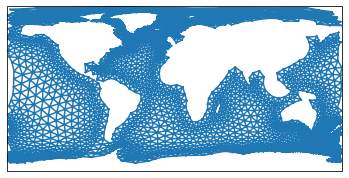

In [4]:
da.pyfesom2.plot_mesh()

da.pyfesom2.temp.plot_mesh()

## 1.2 Contours, Filled Contours and Raster Plot.

kwargs in plot methods are a mixture of conviniences from xarray and some from matplotlib, a user need not worry about these differences.

### 1.2.1 Contours

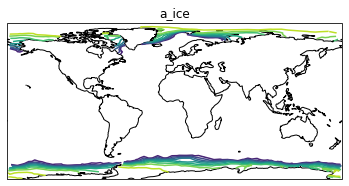

In [5]:
da.isel(time=0).pyfesom2.a_ice.contour() # levels may be used to control contour levels

### 1.2.2 Filled Contours


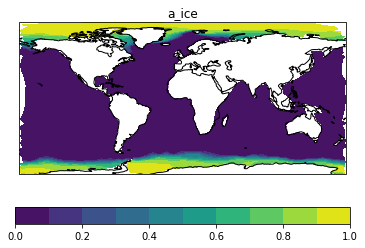

In [6]:
da.isel(time=0).pyfesom2.a_ice.contourf() # levels may be used to control contour levels

## 1.4 Raster Plotting

shading 'flat' or 'gouraud' for smoother, interpolated plot see https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolormesh_grids.html for visual illustration of differences

In [8]:
sel = da.isel(time=0, nz1=0).pyfesom2.select(region=(-20,60,20,80))

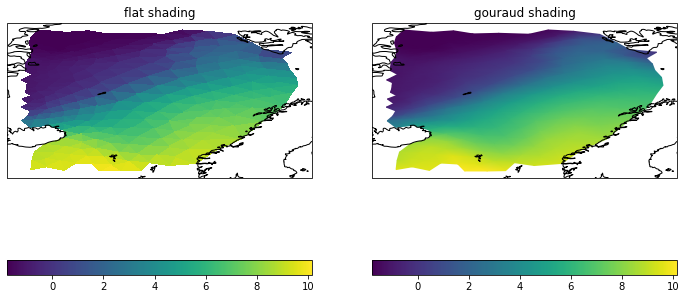

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
f, (ax0,ax1) =plt.subplots(nrows=1,ncols=2, figsize=(12,10), subplot_kw={'projection': ccrs.PlateCarree()})

sel.pyfesom2.temp.pcolor(ax=ax0, title='flat shading')

sel.pyfesom2.temp.pcolor(ax=ax1, shading='gouraud', title='gouraud shading')

### 1.5 Projections

In [10]:
import cartopy.crs as ccrs

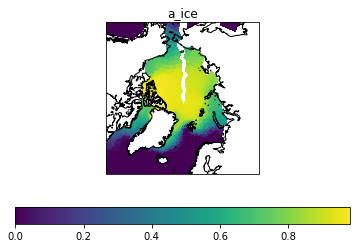

In [15]:
da.isel(time=0).pyfesom2.a_ice.pcolor(projection=ccrs.NorthPolarStereo(), extents=(-180,180,60,90))

## 1.3 Transect plot

Transect plot provides convinience to do transect selections and (customized) plot in one step. As the returned dataset for a transect selection is a regular dataset, for any other plot preferences, one may select data using select_points and use regular xarray plotting or matplotlib methods, for instance: 

    sel = ds.temp.pyfesom2.select_points(lon=.., lat=..., time=...)
    sel.plot(...)

In [17]:
from pyfesom2.datasets import core 
fesom_ds = core.load()
fesom_ds

<xarray.Dataset>
Dimensions:  (elem: 244659, nelem: 243899, nod2: 126858, nz: 48, nz1: 47, three: 3, time: 10)
Coordinates:
    faces    (nelem, three) uint32 dask.array<chunksize=(60975, 2), meta=np.ndarray>
    lat      (nod2) float64 dask.array<chunksize=(31715,), meta=np.ndarray>
    lon      (nod2) float64 dask.array<chunksize=(31715,), meta=np.ndarray>
  * nz       (nz) float64 0.0 -5.0 -10.0 -20.0 ... -5.65e+03 -6e+03 -6.25e+03
  * nz1      (nz1) float64 -2.5 -7.5 -15.0 ... -5.525e+03 -5.825e+03 -6.125e+03
  * time     (time) datetime64[ns] 1948-12-30T23:15:00 ... 1957-12-31T23:15:00
Dimensions without coordinates: elem, nelem, nod2, three
Data variables:
    Av       (time, elem, nz) float32 dask.array<chunksize=(1, 244659, 48), meta=np.ndarray>
    bolus_w  (time, nod2, nz) float32 dask.array<chunksize=(1, 126858, 48), meta=np.ndarray>
    salt     (time, nod2, nz1) float32 dask.array<chunksize=(1, 126858, 47), meta=np.ndarray>
    temp     (time, nod2, nz1) float32 dask.array<chunksize=(1, 126858, 47), meta=np.ndarray>
    u        (time, elem, nz1) float32 dask.array<chunksize=(1, 244659, 47), meta=np.ndarray>
    v        (time, elem, nz1) float32 dask.array<chunksize=(1, 244659, 47), meta=np.ndarray>
    w        (time, nod2, nz) float32 dask.array<chunksize=(1, 126858, 48), meta=np.ndarray>
Attributes:
    Dataset URL:  https://swiftbrowser.dkrz.de/public/dkrz_035d8f6ff058403bb4...

In [23]:
# create a dummy transect 
import pandas as pd
import numpy as np

# Define selection values in time, depth, lat, lon
sel_times = pd.date_range('1950-01-01', freq='Y', periods=10)
sel_lats = np.linspace(-90,90,10) 
sel_lons = np.linspace(-180,180,10)

/home/suvarchal/AWI/pyfesom2_temp/pyfesom2_accessors_sel/pyfesom2/accessor.py:983: MatplotlibDeprecationWarning: 
The ax attribute was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  ax = plot.ax if hasattr(plot, 'ax') else plot.axes  # akward some plots have it as ax, some as axes depending on


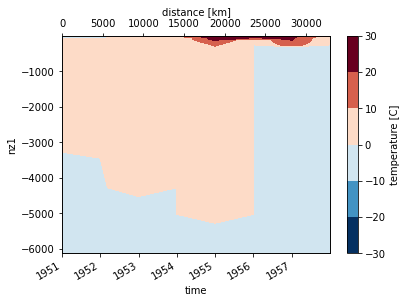

In [24]:
fesom_ds.pyfesom2.temp.plot_transect(lon=sel_lons, lat=sel_lats, time=sel_times)